In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from data_processing import getData

pd.set_option("display.max_columns", None)
plt.rcParams["figure.figsize"] = (24, 10)
plt.rcParams["axes.titlesize"] = 30
plt.rcParams["axes.labelsize"] = 20
# fix seed so code can be reproduced
np.random.seed(420)

In [3]:
# from https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = "bottom"

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = "top"

        # Use Y value as label and format number with two decimal places
        label = "{:.2f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,  # Use `label` as label
            (x_value, y_value),  # Place label at end of the bar
            xytext=(0, space),  # Vertically shift label by `space`
            textcoords="offset points",  # Interpret `xytext` as offset in points
            ha="center",  # Horizontally center label
            va=va,
        )  # Vertically align label differently for
        # positive and negative values.

In [4]:
df = getData()

/tmp/ipykernel_5789/743798274.py:1: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  df = getData()


In [5]:
print("Percentage of missing values for each column")
temp = (df.isna().sum() / len(df)).to_frame()
temp.T

Percentage of missing values for each column


,C1_Flag,C1_School closing,C2_Flag,C2_Workplace closing,C3_Cancel public events,C3_Flag,C4_Flag,C4_Restrictions on gatherings,C5_Close public transport,C5_Flag,C6_Flag,C6_Stay at home requirements,C7_Flag,C7_Restrictions on internal movement,C8_International travel controls,ConfirmedDeaths,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,CountryCode,E1_Flag,E1_Income support,E2_Debt/contract relief,EconomicSupportIndex,EconomicSupportIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,H1_Flag,H1_Public information campaigns,H2_Testing policy,H3_Contact tracing,H6_Facial Coverings,H6_Flag,H7_Flag,H7_Vaccination policy,H8_Flag,H8_Protection of elderly people,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,aged_65_older,aged_70_older,cardiovasc_death_rate,continent,date,diabetes_prevalence,extreme_poverty,female_smokers,gdp_per_capita,handwashing_facilities,hospital_beds_per_thousand,human_development_index,life_expectancy,male_smokers,median_age,new_vaccinations,people_fully_vaccinated,people_vaccinated,population,population_density,positive_rate,total_cases,total_tests,total_vaccinations,weekday,reproduction_rate,new_deaths,E4_International support,H5_Investment in vaccines,E3_Fiscal measures,new_tests,new_cases,H4_Emergency investment in healthcare,location
0,0.159721,0.015757,0.1786,0.015947,0.015861,0.134477,0.151445,0.016325,0.016192,0.520969,0.324843,0.016022,0.463122,0.016637,0.015852,0.001627,0.018358,0.012608,0.0,0.372342,0.017205,0.018831,0.019824,0.013923,0.02042,0.014509,0.028687,0.016164,0.017157,0.019853,0.01554,0.137854,0.572308,0.015691,0.29784,0.019777,0.016174,0.010423,0.015994,0.010243,0.0,0.041058,0.0,0.0,0.0,0.0,0.327047,0.213264,0.041332,0.0,0.114047,0.0,0.0,0.0,0.0,0.290869,0.315735,0.295532,0.0,0.017592,0.40345,0.0,0.392327,0.289252,0.0,0.090884,0.001627,0.173975,0.030456,0.173615,0.392327,0.0,0.177985,0.0


In [6]:
# Regression cannot handle NaN-values, so we'll have to get rid of the columns that have too many of them
threshhold = 0.1
cols_to_keep = temp[(temp < threshhold).to_numpy()].index
df = df[cols_to_keep]
# we'll replace the remaining missing values with the mean of that column
df.fillna(df.mean(), inplace=True)
df.head()

/tmp/ipykernel_5789/2206387269.py:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(), inplace=True)
/tmp/ipykernel_5789/2206387269.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,ConfirmedDeaths,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,CountryCode,E1_Income support,E2_Debt/contract relief,EconomicSupportIndex,EconomicSupportIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,H1_Flag,H1_Public information campaigns,H2_Testing policy,H3_Contact tracing,H6_Facial Coverings,H7_Vaccination policy,H8_Protection of elderly people,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,aged_65_older,aged_70_older,cardiovasc_death_rate,continent,date,diabetes_prevalence,gdp_per_capita,handwashing_facilities,human_development_index,life_expectancy,male_smokers,median_age,population,population_density,total_cases,weekday,reproduction_rate,new_deaths,H5_Investment in vaccines,new_cases,location
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,11.31,11.31,AFG,0.0,0.0,0.0,0.0,9.9,9.9,0.995589,0.0,1.0,1.0,0.0,0.0,0.0,8.33,8.33,10.71,10.71,2.581,1.337,597.029,Asia,2020-02-24,9.59,1803.987,37.746,0.511,64.83,39.697368,18.6,39835428.0,54.422,5.0,0,1.003643,0.0,0.0,5.0,Afghanistan
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,11.31,11.31,AFG,0.0,0.0,0.0,0.0,9.9,9.9,0.995589,0.0,1.0,1.0,0.0,0.0,0.0,8.33,8.33,10.71,10.71,2.581,1.337,597.029,Asia,2020-02-25,9.59,1803.987,37.746,0.511,64.83,39.697368,18.6,39835428.0,54.422,5.0,1,1.003643,0.0,0.0,0.0,Afghanistan
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,11.31,11.31,AFG,0.0,0.0,0.0,0.0,9.9,9.9,0.995589,0.0,1.0,1.0,0.0,0.0,0.0,8.33,8.33,10.71,10.71,2.581,1.337,597.029,Asia,2020-02-26,9.59,1803.987,37.746,0.511,64.83,39.697368,18.6,39835428.0,54.422,5.0,2,1.003643,0.0,0.0,0.0,Afghanistan
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,11.31,11.31,AFG,0.0,0.0,0.0,0.0,9.9,9.9,0.995589,0.0,1.0,1.0,0.0,0.0,0.0,8.33,8.33,10.71,10.71,2.581,1.337,597.029,Asia,2020-02-27,9.59,1803.987,37.746,0.511,64.83,39.697368,18.6,39835428.0,54.422,5.0,3,1.003643,0.0,0.0,0.0,Afghanistan
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,11.31,11.31,AFG,0.0,0.0,0.0,0.0,9.9,9.9,0.995589,0.0,1.0,1.0,0.0,0.0,0.0,8.33,8.33,10.71,10.71,2.581,1.337,597.029,Asia,2020-02-28,9.59,1803.987,37.746,0.511,64.83,39.697368,18.6,39835428.0,54.422,5.0,4,1.003643,0.0,0.0,0.0,Afghanistan


Text(0, 0.5, 'Number of new cases')

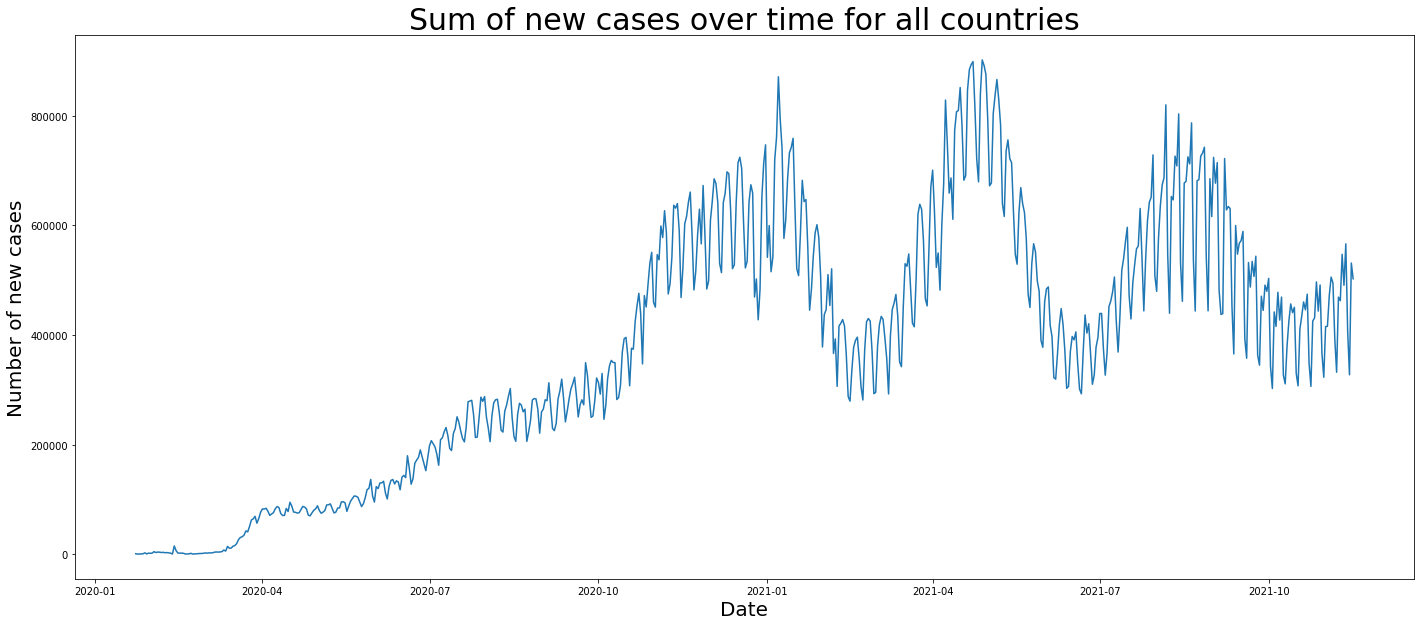

In [7]:
# since we want to predict the number of new cases, we should first take a look at that column
groupby_date = df[["date", "new_cases"]].groupby("date").sum()
plt.plot(groupby_date.index, groupby_date)
plt.title("Sum of new cases over time for all countries")
plt.xlabel("Date")
plt.ylabel("Number of new cases")

In [8]:
# we want to predict the number of new cases for the next 3 months, but since we're more interested in the trend than the actual numbers,
# we'll just predict a trend, but before we can predict the trend we have to create it as a column
# to create the trend we'll look at the number of new_cases daily for the next 3 months (next 90 days) of one timestamp 
# and fit a linear regression model to it and use w_1 as the trend (since this might vary a lot we'll divide new_cases by the population of that country
# and since this results in very small values, we'll multiply it by 1e6 before)
WINDOW_SIZE = 90
SCALE = 1e6


def rolling_window(a, window):
    """from https://stackoverflow.com/questions/27852343/split-python-sequence-time-series-array-into-subsequences-with-overlap"""
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)


def weight(var1, var2):
    mean_var1, mean_var2 = np.mean(var1), np.mean(var2, axis=1)
    std_var1, std_var2 = np.std(var1), np.std(var2, axis=1)
    # if std_var2 is 0, this will give a NaN, which is why we need to replace it with 0
    correlation = (
        1
        / (len(var1))
        * (
            np.sum((var1 - mean_var1) * (var2 - mean_var2[:, np.newaxis]), axis=1)
            / (std_var2 * std_var1)
        )
    )
    return np.nan_to_num(correlation * (std_var2 / std_var1))
    

def getTrendForAll(arr, window_size):
    rolling = rolling_window(arr, window_size)[1:]
    w_1 = weight(np.arange(window_size), rolling)
    fill = np.empty((window_size,))
    fill[:] = np.nan
    return np.append(w_1, fill)


trends = list(df.groupby("location").apply(lambda x: getTrendForAll((x["new_cases"]*SCALE/x["population"]).to_numpy(), WINDOW_SIZE)))
trends = [elem for sublist in trends for elem in sublist]
df["trend"] = trends

/tmp/ipykernel_5789/3279858908.py:25: RuntimeWarning: invalid value encountered in true_divide
  np.sum((var1 - mean_var1) * (var2 - mean_var2[:, np.newaxis]), axis=1)


In [9]:
# let's see which columns are actually correlated to our new column trend (those that aren't correlated at all can be removed)
# non-numerical columns shouldn't be considered for this
non_numerical_cols = ["location", "date", "weekday", "continent", "CountryCode"]


def correlation(var1, var2):
    mean_var1, mean_var2 = np.mean(var1), np.mean(var2)
    std_var1, std_var2 = np.std(var1), np.std(var2)
    return (
        1
        / (len(var1))
        * (
            np.sum(
                (var1 - mean_var1) * (var2 - mean_var2),
            )
            / (std_var2 * std_var1)
        )
    )


temp = df[df["date"] < df["date"].max() - pd.Timedelta(WINDOW_SIZE, "days")]
temp = temp[temp.columns.difference(non_numerical_cols)]
# since we're interested in the magnitude of the correlation, we'll use abs(correlation)
temp = temp.apply(lambda x: np.abs(correlation(x.to_numpy(), temp["trend"].to_numpy()))).sort_values(ascending = False)
print("Correlation of each column to trend, sorted:")
temp.to_frame().T

Correlation of each column to trend, sorted:


,trend,new_cases,new_deaths,C6_Stay at home requirements,StringencyIndex,StringencyIndexForDisplay,C4_Restrictions on gatherings,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,reproduction_rate,C3_Cancel public events,median_age,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,aged_70_older,aged_65_older,handwashing_facilities,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,human_development_index,H6_Facial Coverings,C1_School closing,C2_Workplace closing,C7_Restrictions on internal movement,C5_Close public transport,life_expectancy,H3_Contact tracing,total_cases,male_smokers,ConfirmedDeaths,EconomicSupportIndex,EconomicSupportIndexForDisplay,H7_Vaccination policy,E1_Income support,C8_International travel controls,E2_Debt/contract relief,gdp_per_capita,population,diabetes_prevalence,H1_Public information campaigns,H5_Investment in vaccines,H1_Flag,cardiovasc_death_rate,H8_Protection of elderly people,H2_Testing policy,population_density
0,1.0,0.113897,0.087707,0.07479,0.069466,0.069462,0.067307,0.066517,0.066517,0.063598,0.06165,0.055214,0.053745,0.053742,0.053201,0.053159,0.052323,0.05206,0.05206,0.05062,0.047876,0.046143,0.044829,0.042536,0.039799,0.037576,0.033719,0.031006,0.028824,0.027873,0.027401,0.027401,0.025725,0.024796,0.020679,0.020303,0.018405,0.013539,0.013134,0.012676,0.011674,0.01085,0.005855,0.003241,0.00208,0.001244


Text(0, 0.5, 'Magnitude')

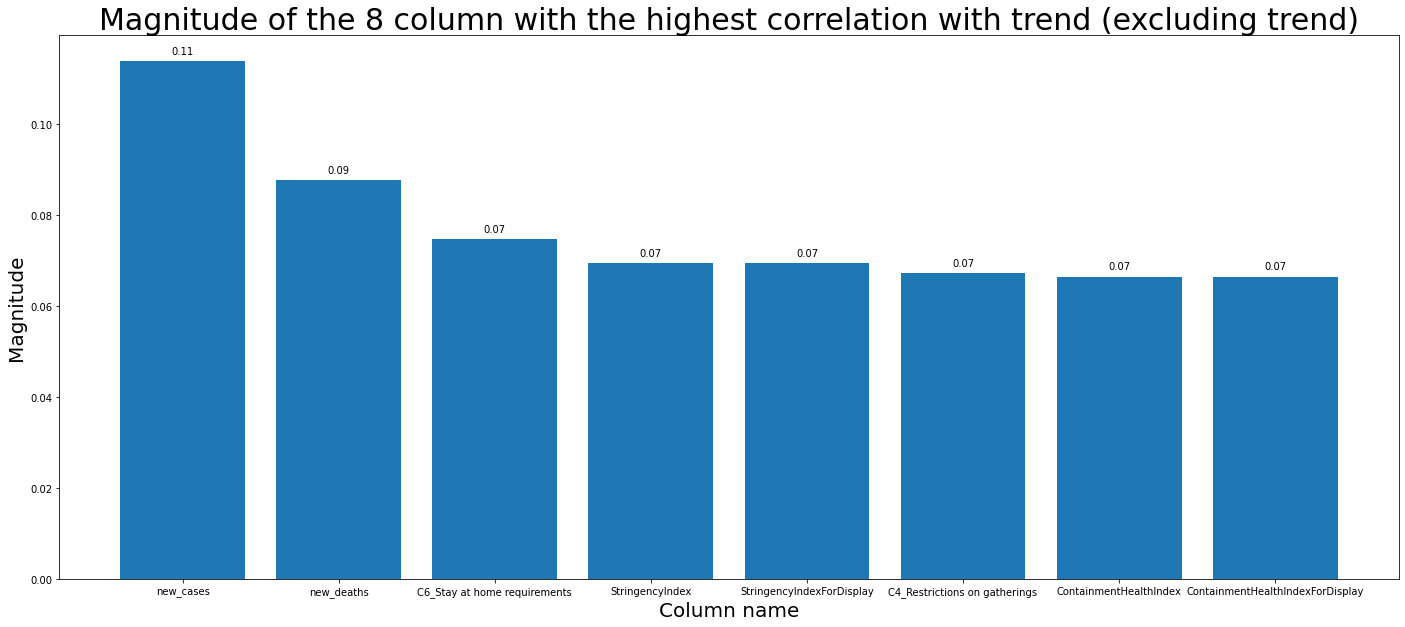

In [10]:
# it seems that all of the attributes have a rather low correlation with the trend, this could mean that our trend attribute might not be a good representative
# it could also be that this is just a very complex attribute which needs many attributes to be properly predicted
# if we had more data, it would probably be wise to remove columns that have very low correlation with the to-be-predicted attribute, however
# computation costs should be fine for our data
plt.bar(temp[1:9].index, temp[1:9])
add_value_labels(plt.gca())
plt.title("Magnitude of the 8 column with the highest correlation with trend (excluding trend)")
plt.xlabel("Column name")
plt.ylabel("Magnitude")

In [11]:
# maybe adding the number of new_cases for the last k days will help us in prediction so let's add it as an attribute
K = 30

def add_attribute(df, column_to_add, k):
    copy = df.copy()
    for i in range(1, k+1):
        filler = np.empty((i,))
        filler[:] = np.nan
        copy["{}_t-{}".format(column_to_add, i)] = np.append(filler, copy[column_to_add].iloc[:-i].to_numpy())

    return copy

df = add_attribute(df, "new_cases", K)

In [12]:
# let's split the data into training-, test- and validation-data now (we'll need the test + validation data for hyperparameter-tuning later)
# remember that first K days have some NaN values and last WINDOW_SIZE days as well (for each country) (countries have different starting dates and ends)
split = 0.6, 0.2, 0.2

train_data = df.groupby("location").apply(
    lambda x: x[
        (x["date"] > x["date"].min() + pd.Timedelta(K, "days"))
        & (
            x["date"]
            < x["date"].max()
            - pd.Timedelta(WINDOW_SIZE, "days")
            - (
                (
                    x["date"].max()
                    - pd.Timedelta(WINDOW_SIZE, "days")
                    - (x["date"].min() + pd.Timedelta(K, "days"))
                )
                * (split[1] + split[2])
            )
        )
    ]
)
test_data = df.groupby("location").apply(
    lambda x: x[
        (
            x["date"]
            > x["date"].min()
            + pd.Timedelta(K, "days")
            + (
                (
                    x["date"].max()
                    - pd.Timedelta(WINDOW_SIZE, "days")
                    - (x["date"].min() + pd.Timedelta(K, "days"))
                )
                * split[0]
            )
        )
        & (
            x["date"]
            < x["date"].max()
            - pd.Timedelta(WINDOW_SIZE, "days")
            - (
                x["date"].max()
                - pd.Timedelta(WINDOW_SIZE, "days")
                - (x["date"].min() + pd.Timedelta(K, "days"))
            )
            * (split[2])
        )
    ]
)
val_data = df.groupby("location").apply(
    lambda x: x[
        (
            x["date"]
            > x["date"].min()
            + pd.Timedelta(K, "days")
            + (
                (
                    x["date"].max()
                    - pd.Timedelta(WINDOW_SIZE, "days")
                    - (x["date"].min() + pd.Timedelta(K, "days"))
                )
                * (split[0] + split[1])
            )
        )
        & (x["date"] < x["date"].max() - pd.Timedelta(WINDOW_SIZE, "days"))
    ]
)

In [13]:
# Example spread of data into train, test and val for Norway
print("Train data for Norway is between {} and {}".format(train_data[train_data["location"] == "Norway"]["date"].min(), train_data[train_data["location"] == "Norway"]["date"].max()))
print("Test data for Norway is between {} and {}".format(test_data[test_data["location"] == "Norway"]["date"].min(), test_data[test_data["location"] == "Norway"]["date"].max()))
print("Validation data for Norway is between {} and {}".format(val_data[val_data["location"] == "Norway"]["date"].min(), val_data[val_data["location"] == "Norway"]["date"].max()))

Train data for Norway is between 2020-03-28 00:00:00 and 2021-01-26 00:00:00
Test data for Norway is between 2021-01-27 00:00:00 and 2021-05-08 00:00:00
Validation data for Norway is between 2021-05-09 00:00:00 and 2021-08-17 00:00:00


In [14]:
# split data into X and y (independent and dependent variable/s), also remove non-numerical columns
diff_cols = train_data.columns.difference(["trend"] + non_numerical_cols)
train_data_X, train_data_y = train_data[diff_cols], train_data["trend"]
test_data_X, test_data_y = test_data[diff_cols], test_data["trend"]
val_data_X, val_data_y = val_data[diff_cols], val_data["trend"]

In [15]:
# to asses model accuracy we'll use the mean absolute error as a loss function
def MAE_loss(y, y_predicted):
    return np.mean(np.abs(y - y_predicted))

# Baseline Model - Simple Linear Regression

In [16]:
# create linear regression as baseline model
baseline_model = LinearRegression().fit(train_data_X, train_data_y)
print(
    "Model score (see sklearn documentation of linear regression) on train data: {:.3f}, test_data {:.3f}, validation data {:.3f}".format(
        baseline_model.score(train_data_X, train_data_y),
        baseline_model.score(test_data_X, test_data_y),
        baseline_model.score(val_data_X, val_data_y),
    )
)
pred_val = baseline_model.predict(val_data_X)
baseline_loss = MAE_loss(val_data_y, pred_val)
print("MAE loss of our baseline model on validation data: {:.3f}".format(baseline_loss))

Model score (see sklearn documentation of linear regression) on train data: 0.073, test_data -0.220, validation data -0.123
MAE loss of our baseline model on validation data: 2.037


Text(0.5, 0, 'Name')

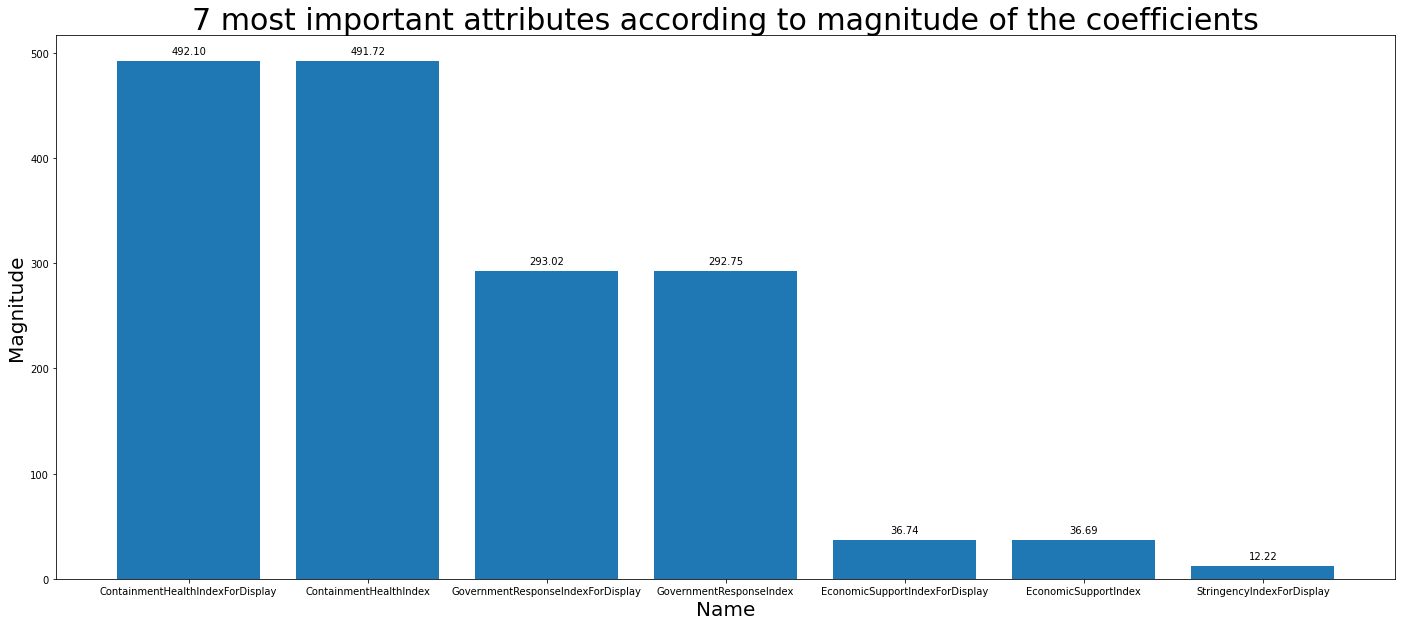

In [17]:
# this seems pretty bad overall, but it's only the first model
# let's look at which attributes were most important
together = [(abs(coef), name) for coef, name in zip(baseline_model.coef_, diff_cols)]
together.sort(key = lambda x: x[0], reverse = True)
coef_sorted, name_sorted = [elem[0] for elem in together], [elem[1] for elem in together]
n_first = 7
plt.bar(name_sorted[:n_first], coef_sorted[:n_first])
add_value_labels(plt.gca())
plt.title("{} most important attributes according to magnitude of the coefficients".format(n_first))
plt.ylabel("Magnitude")
plt.xlabel("Name")

In [18]:
# this doesn't contain new_cases, which is kind of weird since it had the highest correlation with the trend, maybe other models will have it?
print("Magnitude of coefficients with corresponding column names of the model, sorted:")
pd.DataFrame({"name": name_sorted, "coef": coef_sorted}).set_index("name").T

Magnitude of coefficients with corresponding column names of the model, sorted:


name,ContainmentHealthIndexForDisplay,ContainmentHealthIndex,GovernmentResponseIndexForDisplay,GovernmentResponseIndex,EconomicSupportIndexForDisplay,EconomicSupportIndex,StringencyIndexForDisplay,StringencyIndex,StringencyLegacyIndexForDisplay,StringencyLegacyIndex,human_development_index,E2_Debt/contract relief,H3_Contact tracing,E1_Income support,H1_Flag,H2_Testing policy,H8_Protection of elderly people,H6_Facial Coverings,reproduction_rate,H7_Vaccination policy,C6_Stay at home requirements,aged_65_older,C1_School closing,H1_Public information campaigns,C4_Restrictions on gatherings,aged_70_older,C3_Cancel public events,C5_Close public transport,median_age,C8_International travel controls,C2_Workplace closing,life_expectancy,C7_Restrictions on internal movement,male_smokers,diabetes_prevalence,handwashing_facilities,new_deaths,cardiovasc_death_rate,new_cases,new_cases_t-1,ConfirmedDeaths,new_cases_t-2,population_density,new_cases_t-29,new_cases_t-3,new_cases_t-7,new_cases_t-4,new_cases_t-5,new_cases_t-21,new_cases_t-28,new_cases_t-30,new_cases_t-8,new_cases_t-22,gdp_per_capita,new_cases_t-6,new_cases_t-13,new_cases_t-11,new_cases_t-9,new_cases_t-17,new_cases_t-26,new_cases_t-10,new_cases_t-25,new_cases_t-24,new_cases_t-15,new_cases_t-12,new_cases_t-18,new_cases_t-23,new_cases_t-20,new_cases_t-14,new_cases_t-16,new_cases_t-27,new_cases_t-19,total_cases,H5_Investment in vaccines,population
coef,492.102578,491.71854,293.022968,292.745443,36.744688,36.690661,12.217759,12.149239,11.977317,11.952213,2.009712,0.597549,0.527713,0.406462,0.365216,0.350782,0.293758,0.228237,0.195888,0.133885,0.103742,0.08343,0.080015,0.07566,0.075511,0.074106,0.053464,0.022177,0.021528,0.016762,0.014783,0.011202,0.006144,0.00479,0.003964,0.003241,0.000664,0.000236,0.00003,0.000027,0.000024,0.000018,0.000014,0.000013,0.000013,0.000012,0.000009,0.000009,0.000008,0.000008,0.000008,0.000007,0.000006,0.000005,0.000004,0.000003,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000001,0.000001,0.000001,0.000001,0.000001,9.039894e-07,7.147441e-07,5.647648e-07,3.955617e-07,1.178657e-07,2.706202e-08,4.226535e-10,1.350422e-10


# Linear Regression with polynomial columns

In [19]:
def create_feature_df(df, powers):
    data = {}
    for pow in powers:
        for column in df.columns:
            data[column + "_pow{}".format(pow)] = df[column] ** pow

    return pd.DataFrame(data = data)

best_mae = None
best_max_power = None
best_poly_reg = None
for max_power in range(1, 20):
    powers = np.arange(1, max_power+1)
    reg = LinearRegression().fit(create_feature_df(train_data_X, powers), train_data_y)
    pred_test = reg.predict(create_feature_df(test_data_X, powers))
    mae = MAE_loss(test_data_y, pred_test)
    if best_mae is None or mae < best_mae:
        best_mae = mae
        best_max_power = max_power
        best_poly_reg = reg

In [20]:
pred_val = best_poly_reg.predict(create_feature_df(val_data_X, np.arange(1, best_max_power+1)))
print(
    "Model score (see sklearn documentation of linear regression) on train data: {:.3f}, test_data {:.3f}, validation data {:.3f}".format(
        best_poly_reg.score(create_feature_df(train_data_X, np.arange(1, best_max_power+1)), train_data_y),
        best_poly_reg.score(create_feature_df(test_data_X, np.arange(1, best_max_power+1)), test_data_y),
        best_poly_reg.score(create_feature_df(val_data_X, np.arange(1, best_max_power+1)), val_data_y),
    )
)
best_poly_reg_loss = MAE_loss(val_data_y, pred_val)
print("MAE loss of the best polynomial regression model (max_power = {}) on validation data: {:.3f}".format(best_max_power, best_poly_reg_loss))

Model score (see sklearn documentation of linear regression) on train data: -0.018, test_data -0.048, validation data -0.000
MAE loss of the best polynomial regression model (max_power = 6) on validation data: 1.951


Text(0.5, 0, 'Name')

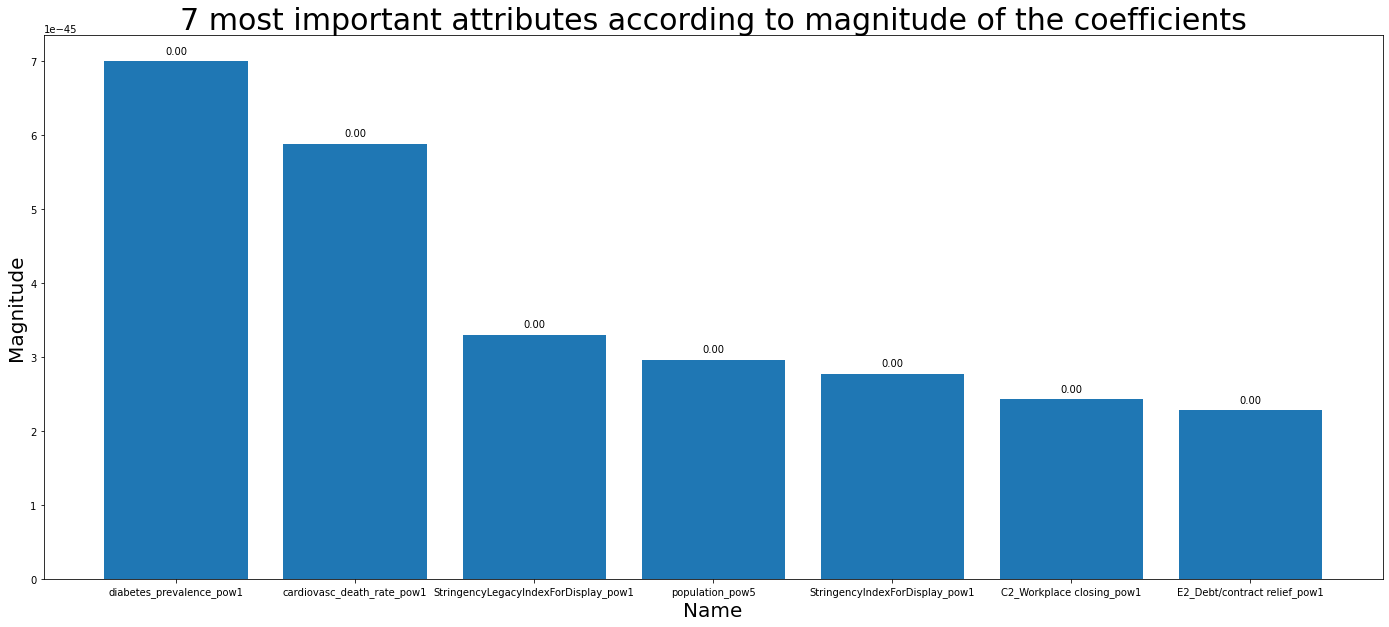

In [21]:
# the scores on the model are kind of weird, it's like it's always just predicting the mean of y
# however the MAE is now better, which is pretty nice
# let's also look at which attributes were most significant for predictions
together = [(abs(coef), name) for coef, name in zip(best_poly_reg.coef_, create_feature_df(test_data_X, np.arange(1,best_max_power+1)).columns)]
together.sort(key = lambda x: x[0], reverse = True)
coef_sorted, name_sorted = [elem[0] for elem in together], [elem[1] for elem in together]
n_first = 7
plt.bar(name_sorted[:n_first], coef_sorted[:n_first])
add_value_labels(plt.gca())
plt.title("{} most important attributes according to magnitude of the coefficients".format(n_first))
plt.ylabel("Magnitude")
plt.xlabel("Name")

In [22]:
# these magnitude are all soooo low, which is kind of weird, but I guess the prediction got better
print("Magnitude of coefficients with corresponding column names of the model, sorted:")
pd.DataFrame({"name": name_sorted, "coef": coef_sorted}).set_index("name").T

Magnitude of coefficients with corresponding column names of the model, sorted:


name,diabetes_prevalence_pow1,cardiovasc_death_rate_pow1,StringencyLegacyIndexForDisplay_pow1,population_pow5,StringencyIndexForDisplay_pow1,C2_Workplace closing_pow1,E2_Debt/contract relief_pow1,EconomicSupportIndexForDisplay_pow1,H5_Investment in vaccines_pow1,H2_Testing policy_pow1,EconomicSupportIndex_pow1,StringencyIndex_pow1,H1_Public information campaigns_pow1,H8_Protection of elderly people_pow1,ContainmentHealthIndexForDisplay_pow1,H3_Contact tracing_pow1,C7_Restrictions on internal movement_pow1,H7_Vaccination policy_pow1,C6_Stay at home requirements_pow1,H1_Flag_pow1,C5_Close public transport_pow1,total_cases_pow6,ContainmentHealthIndex_pow1,C3_Cancel public events_pow1,StringencyLegacyIndex_pow1,C4_Restrictions on gatherings_pow1,C1_School closing_pow1,E1_Income support_pow1,ConfirmedDeaths_pow1,C8_International travel controls_pow1,H6_Facial Coverings_pow1,GovernmentResponseIndexForDisplay_pow1,aged_70_older_pow1,aged_65_older_pow1,H5_Investment in vaccines_pow5,GovernmentResponseIndex_pow1,H5_Investment in vaccines_pow4,total_cases_pow5,population_pow4,population_pow6,ConfirmedDeaths_pow6,new_cases_pow6,new_cases_t-6_pow6,new_cases_t-1_pow6,new_cases_t-7_pow6,new_cases_t-11_pow6,new_cases_t-13_pow6,new_cases_t-8_pow6,new_cases_t-14_pow6,new_cases_t-12_pow6,new_cases_t-15_pow6,new_cases_t-2_pow6,new_cases_t-5_pow6,new_cases_t-9_pow6,new_cases_t-16_pow6,new_cases_t-10_pow6,new_cases_t-17_pow6,new_cases_t-3_pow6,new_cases_t-18_pow6,new_cases_t-4_pow6,new_cases_t-19_pow6,new_cases_t-20_pow6,new_cases_t-21_pow6,new_cases_t-22_pow6,new_cases_t-30_pow6,new_cases_t-25_pow6,new_cases_t-29_pow6,new_cases_t-26_pow6,new_cases_t-27_pow6,new_cases_t-23_pow6,new_cases_t-28_pow6,gdp_per_capita_pow6,new_cases_t-24_pow6,H5_Investment in vaccines_pow6,total_cases_pow4,ConfirmedDeaths_pow5,H5_Investment in vaccines_pow3,population_pow3,new_cases_pow5,population_density_pow6,new_cases_t-1_pow5,new_cases_t-6_pow5,new_cases_t-7_pow5,new_cases_t-8_pow5,new_cases_t-2_pow5,new_cases_t-11_pow5,new_cases_t-5_pow5,new_cases_t-13_pow5,new_cases_t-14_pow5,new_cases_t-12_pow5,new_cases_t-9_pow5,new_cases_t-3_pow5,new_cases_t-15_pow5,new_cases_t-10_pow5,new_cases_t-4_pow5,new_cases_t-16_pow5,new_cases_t-17_pow5,new_cases_t-18_pow5,new_cases_t-19_pow5,new_cases_t-20_pow5,new_cases_t-21_pow5,new_cases_t-22_pow5,new_cases_t-23_pow5,new_cases_t-30_pow5,gdp_per_capita_pow5,new_cases_t-24_pow5,new_cases_t-29_pow5,new_cases_t-28_pow5,new_cases_t-26_pow5,new_cases_t-27_pow5,new_cases_t-25_pow5,ConfirmedDeaths_pow4,population_density_pow5,total_cases_pow3,new_cases_pow4,new_cases_t-1_pow4,new_cases_t-2_pow4,new_cases_t-6_pow4,new_cases_t-7_pow4,new_cases_t-5_pow4,new_cases_t-8_pow4,new_cases_t-3_pow4,new_cases_t-4_pow4,new_cases_t-11_pow4,new_cases_t-9_pow4,new_cases_t-13_pow4,new_cases_t-10_pow4,new_cases_t-12_pow4,new_cases_t-14_pow4,new_cases_t-15_pow4,new_cases_t-16_pow4,new_cases_t-17_pow4,new_cases_t-18_pow4,new_cases_t-19_pow4,gdp_per_capita_pow4,new_cases_t-20_pow4,new_cases_t-21_pow4,new_cases_t-22_pow4,new_deaths_pow6,new_cases_t-23_pow4,new_cases_t-24_pow4,new_cases_t-25_pow4,new_cases_t-26_pow4,new_cases_t-27_pow4,new_cases_t-28_pow4,new_cases_t-29_pow4,new_cases_t-30_pow4,population_pow2,H5_Investment in vaccines_pow2,population_density_pow4,cardiovasc_death_rate_pow6,new_deaths_pow5,ConfirmedDeaths_pow3,gdp_per_capita_pow3,new_cases_pow3,new_cases_t-1_pow3,new_cases_t-2_pow3,new_cases_t-3_pow3,new_cases_t-6_pow3,new_cases_t-5_pow3,new_cases_t-4_pow3,new_cases_t-7_pow3,new_cases_t-8_pow3,new_cases_t-9_pow3,new_cases_t-11_pow3,new_cases_t-10_pow3,new_cases_t-12_pow3,new_cases_t-13_pow3,new_cases_t-14_pow3,new_cases_t-15_pow3,new_cases_t-16_pow3,new_cases_t-17_pow3,new_cases_t-18_pow3,new_cases_t-19_pow3,new_cases_t-20_pow3,new_cases_t-21_pow3,new_cases_t-22_pow3,new_cases_t-23_pow3,new_cases_t-24_pow3,new_cases_t-25_pow3,new_cases_t-26_pow3,new_cases_t-27_pow3,new_cases_t-28_pow3,new_cases_t-29_pow3,cardiovasc_death_rate_pow5,new_cases_t-30_p

In [23]:
# let's check what the predictions of the model look like
print("Mean of prediction values: {} and std: {}".format(np.mean(pred_val), np.std(pred_val)))

Mean of prediction values: 0.34137202254372473 and std: 0.048399853304552216


# Lasso Regression

In [24]:
penalties = np.logspace(-5, 3, num = 30)
best_lambda = None
best_lasso_reg = None
best_mae = None
for l in penalties:
    reg = Lasso(alpha = l, normalize = True, max_iter=1e5).fit(train_data_X, train_data_y)
    mae = MAE_loss(test_data_y, reg.predict(test_data_X))
    if best_mae is None or mae < best_mae:
        best_lambda = l
        best_lasso_reg = reg
        best_mae = mae

In [25]:
pred_val = best_lasso_reg.predict(val_data_X)
print(
    "Model score (see sklearn documentation of linear regression) on train data: {:.3f}, test_data {:.3f}, validation data {:.3f}".format(
        best_lasso_reg.score(train_data_X, train_data_y),
        best_lasso_reg.score(test_data_X, test_data_y),
        best_lasso_reg.score(val_data_X, val_data_y),
    )
)
best_lasso_reg_loss = MAE_loss(val_data_y, pred_val)
print("MAE loss of the best polynomial regression model (lambda = {}) on validation data: {:.3f}".format(best_lambda, MAE_loss(val_data_y, pred_val)))

Model score (see sklearn documentation of linear regression) on train data: 0.030, test_data -0.064, validation data 0.036
MAE loss of the best polynomial regression model (lambda = 0.00045203536563602405) on validation data: 1.876


In [26]:
# this is similar to what we got for the best polynomial regression, let's look at the prediction values really quick
print("Mean of prediction values: {} and std: {}".format(np.mean(pred_val), np.std(pred_val)))

Mean of prediction values: 0.3161984851153762 and std: 0.33701838943426393


Text(0.5, 0, 'Name')

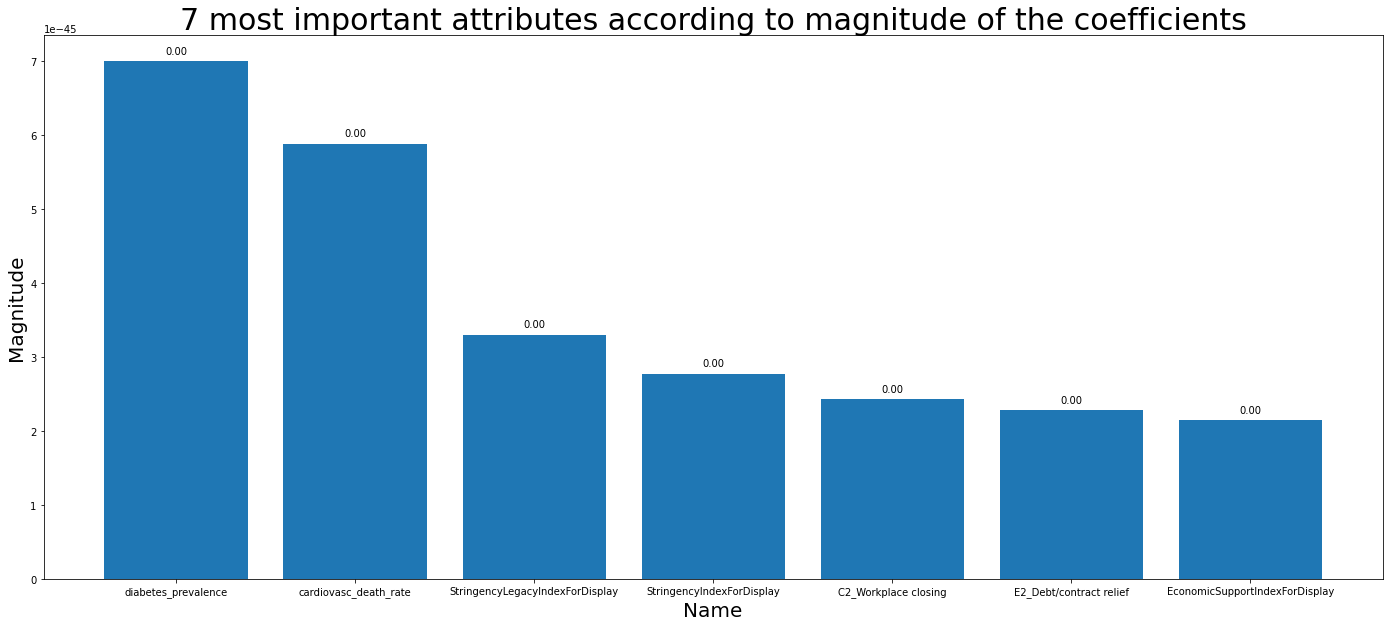

In [27]:
# this time the std is a lot higher which is nice, let's look also look at the importance of each column
together = [(abs(coef), name) for coef, name in zip(best_poly_reg.coef_, train_data_X.columns)]
together.sort(key = lambda x: x[0], reverse = True)
coef_sorted, name_sorted = [elem[0] for elem in together], [elem[1] for elem in together]
n_first = 7
plt.bar(name_sorted[:n_first], coef_sorted[:n_first])
add_value_labels(plt.gca())
plt.title("{} most important attributes according to magnitude of the coefficients".format(n_first))
plt.ylabel("Magnitude")
plt.xlabel("Name")

In [28]:
# these magnitude are all really low as well, which is still kind of weird, but at leat the std is bigger..
print("Magnitude of coefficients with corresponding column names of the model, sorted:")
pd.DataFrame({"name": name_sorted, "coef": coef_sorted}).set_index("name").T

Magnitude of coefficients with corresponding column names of the model, sorted:


name,diabetes_prevalence,cardiovasc_death_rate,StringencyLegacyIndexForDisplay,StringencyIndexForDisplay,C2_Workplace closing,E2_Debt/contract relief,EconomicSupportIndexForDisplay,H5_Investment in vaccines,H2_Testing policy,EconomicSupportIndex,StringencyIndex,H1_Public information campaigns,H8_Protection of elderly people,ContainmentHealthIndexForDisplay,H3_Contact tracing,C7_Restrictions on internal movement,H7_Vaccination policy,C6_Stay at home requirements,H1_Flag,C5_Close public transport,ContainmentHealthIndex,C3_Cancel public events,StringencyLegacyIndex,C4_Restrictions on gatherings,C1_School closing,E1_Income support,ConfirmedDeaths,C8_International travel controls,H6_Facial Coverings,GovernmentResponseIndexForDisplay,aged_70_older,aged_65_older,GovernmentResponseIndex,population,total_cases,new_cases,new_cases_t-1,new_cases_t-2,new_cases_t-3,new_cases_t-4,new_cases_t-5,new_cases_t-6,new_cases_t-7,new_cases_t-8,new_cases_t-9,new_cases_t-10,new_cases_t-11,new_cases_t-12,new_cases_t-13,new_cases_t-14,new_cases_t-15,new_cases_t-16,new_cases_t-17,new_cases_t-18,new_cases_t-19,new_cases_t-20,new_cases_t-21,new_cases_t-22,new_cases_t-23,new_cases_t-24,new_cases_t-25,new_cases_t-26,new_cases_t-27,new_cases_t-28,new_cases_t-29,new_cases_t-30,gdp_per_capita,population_density,new_deaths,handwashing_facilities,male_smokers,median_age,life_expectancy,reproduction_rate,human_development_index
coef,6.993774e-45,5.880520e-45,3.300809e-45,2.774643e-45,2.427775e-45,2.277386e-45,2.140074e-45,1.843529e-45,1.767294e-45,1.727617e-45,9.490819e-46,9.133737e-46,9.018645e-46,7.215748e-46,7.096528e-46,5.658488e-46,5.445437e-46,5.294235e-46,5.130410e-46,3.628042e-46,1.423343e-46,1.090507e-46,9.394093e-47,6.497119e-47,5.415229e-47,3.418824e-47,2.596429e-47,2.094355e-47,1.566461e-47,1.599954e-48,1.031716e-48,9.825630e-49,1.075138e-50,6.218923e-78,4.472580e-80,5.135116e-82,5.101846e-82,5.079057e-82,5.037396e-82,5.016050e-82,5.000740e-82,4.984364e-82,4.951280e-82,4.899663e-82,4.860212e-82,4.809487e-82,4.760440e-82,4.710628e-82,4.673482e-82,4.625286e-82,4.564846e-82,4.502146e-82,4.424008e-82,4.360172e-82,4.284866e-82,4.218303e-82,4.157862e-82,4.081853e-82,4.024253e-82,3.947354e-82,3.882158e-82,3.827042e-82,3.771362e-82,3.718371e-82,3.660823e-82,3.610160e-82,3.322681e-82,6.172112e-83,1.690557e-83,2.449309e-84,4.022988e-85,3.194964e-85,1.448103e-85,2.342014e-86,2.678169e-87


In [29]:
# maybe creating one regression model for each continent/country yields better results?
# first let's try for each continent
continents = train_data["continent"].unique()
continent_train = [train_data[train_data["continent"] == cont] for cont in continents]
continent_test = [test_data[test_data["continent"] == cont] for cont in continents]
continent_val = [val_data[val_data["continent"] == cont] for cont in continents]

In [30]:
continent_regs = []
cols = train_data.columns.difference(non_numerical_cols + ["trend"])
pred_all = []

for i in range(len(continent_train)):
    continent_regs.append(LinearRegression().fit(continent_train[i][cols], continent_train[i]["trend"]))
    pred = continent_regs[i].predict(continent_val[i][cols])
    pred_all.extend(np.abs(pred - continent_val[i]["trend"]))
    print("MAE loss for {}: {}".format(continents[i], MAE_loss(continent_val[i]["trend"], pred)))

continent_reg_loss = np.sum(pred_all)/len(pred_all)
print("Combined MAE loss on validation data: {}".format(continent_reg_loss))

MAE loss for Asia: 7.26736762106196
MAE loss for Europe: 3.681834954237749
MAE loss for Africa: 1.4288453397059433
MAE loss for South America: 9.610844196790518
MAE loss for Oceania: 1.8803089237994752
MAE loss for North America: 5.30422169834472
Combined MAE loss on validation data: 4.498679025674239


In [31]:
# while the individual loss of some continents is better, overall the MAE loss is way worse (probably because of the lack of data)
# so it probably doesn't make sense to train a model for each country

Text(0, 0.5, 'Loss')

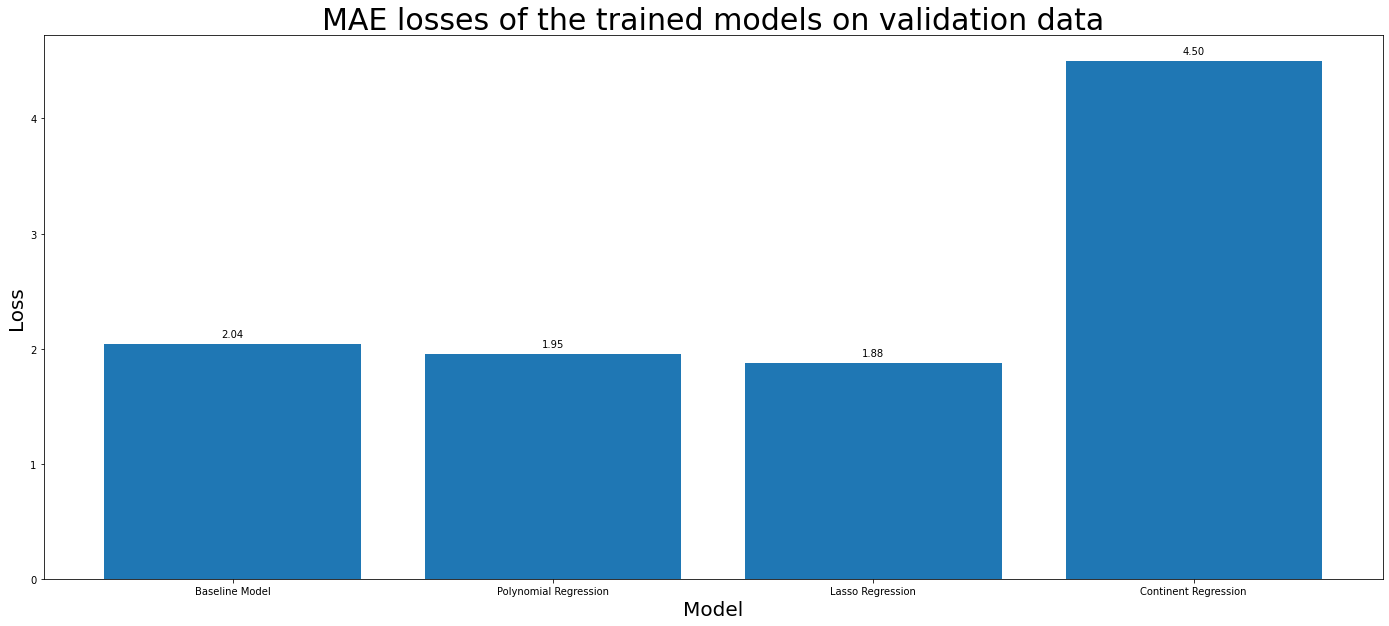

In [40]:
# let's get an overview of the MAE losses for each model
losses = [baseline_loss, best_poly_reg_loss, best_lasso_reg_loss, continent_reg_loss]
plt.bar(np.arange(len(losses)), losses, tick_label = ["Baseline Model", "Polynomial Regression", "Lasso Regression", "Continent Regression"])
add_value_labels(plt.gca())
plt.title("MAE losses of the trained models on validation data")
plt.xlabel("Model")
plt.ylabel("Loss")

# Predictions

Now that we have created some models, maybe it's time to look at some actual predictions and maybe this will help us to create better models.

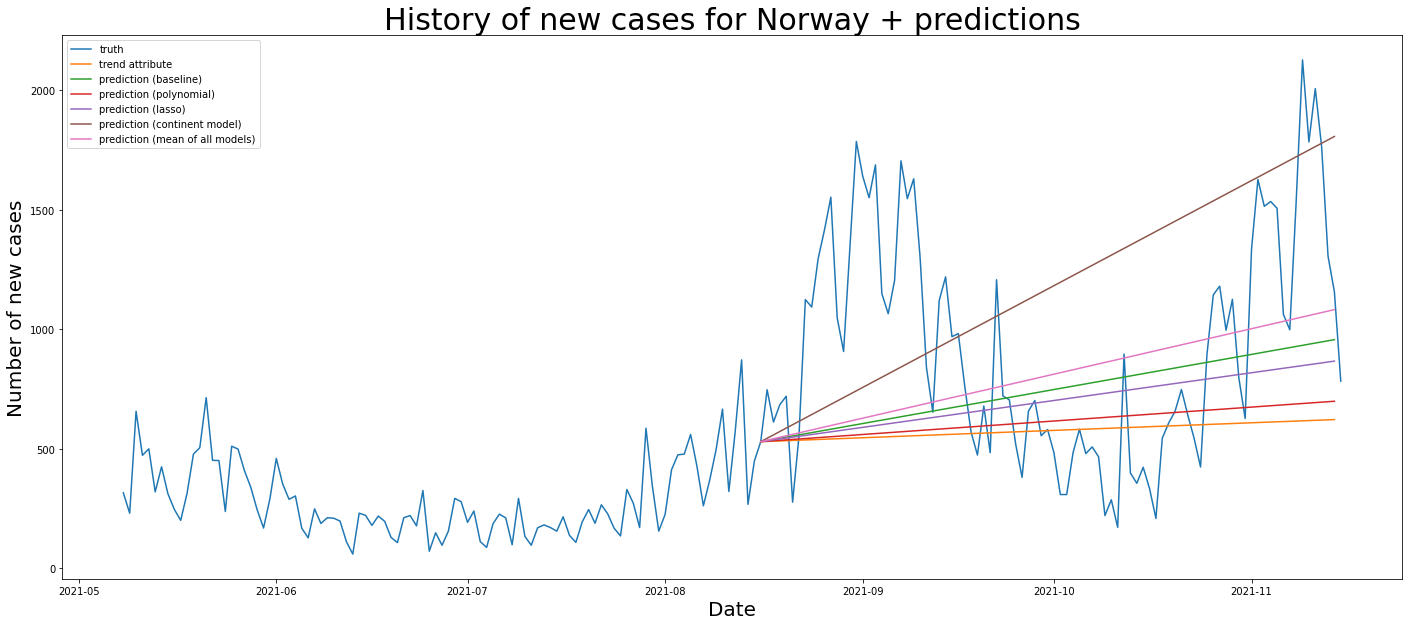

In [ ]:
def predict_val(country):
    temp = val_data[val_data["location"] == country]
    # get prediction
    pred_base = baseline_model.predict(temp.iloc[-2:-1][diff_cols])
    pred_poly = best_poly_reg.predict(
        create_feature_df(temp.iloc[-2:-1][diff_cols], np.arange(1, best_max_power + 1))
    )
    pred_lasso = best_lasso_reg.predict(temp.iloc[-2:-1][diff_cols])
    pred_cont_reg = continent_regs[list(continents).index(temp.iloc[-1]["continent"])].predict(temp.iloc[-2:-1][cols])
    # revert changes that we did (divide by population + scale)
    pred_base = pred_base[0] * temp.iloc[-1]["population"] / SCALE
    pred_poly = pred_poly[0] * temp.iloc[-1]["population"] / SCALE
    pred_lasso = pred_lasso[0] * temp.iloc[-1]["population"] / SCALE
    pred_cont_reg = pred_cont_reg[0] * temp.iloc[-1]["population"] / SCALE
    # convert prediction into actual values
    pred_x = [
        temp.iloc[-1]["date"] + pd.Timedelta(i, "days") for i in range(WINDOW_SIZE + 1)
    ]
    pred_y_base = temp.iloc[-1]["new_cases"] + np.arange(WINDOW_SIZE + 1) * pred_base
    pred_y_poly = temp.iloc[-1]["new_cases"] + np.arange(WINDOW_SIZE + 1) * pred_poly
    pred_y_lasso = temp.iloc[-1]["new_cases"] + np.arange(WINDOW_SIZE + 1) * pred_lasso
    pred_y_cont_reg = temp.iloc[-1]["new_cases"] + np.arange(WINDOW_SIZE + 1) * pred_cont_reg
    pred_y_all = (
        temp.iloc[-1]["new_cases"]
        + np.arange(WINDOW_SIZE + 1) * (pred_base + pred_poly + pred_lasso + pred_cont_reg) / 4
    )
    # get numbers of trend attribute
    trend_y = temp.iloc[-1]["new_cases"] + np.arange(WINDOW_SIZE + 1) * (
        temp.iloc[-1]["trend"] * temp.iloc[-1]["population"] / SCALE
    )
    temp_all = df[df["location"] == country]
    temp_all = temp_all[(temp_all["date"] >= temp.iloc[0]["date"])]
    plt.plot(temp_all["date"], temp_all["new_cases"], label="truth")
    plt.plot(pred_x, trend_y, label="trend attribute")
    plt.plot(pred_x, pred_y_base, label="prediction (baseline)")
    plt.plot(pred_x, pred_y_poly, label="prediction (polynomial)")
    plt.plot(pred_x, pred_y_lasso, label="prediction (lasso)")
    plt.plot(pred_x, pred_y_cont_reg, label="prediction (continent model)")
    plt.plot(pred_x, pred_y_all, label="prediction (mean of all models)")
    plt.title("History of new cases for {} + predictions".format(country))
    plt.xlabel("Date")
    plt.ylabel("Number of new cases")
    plt.legend()


# let's just look at Norway for example
predict_val("Norway")

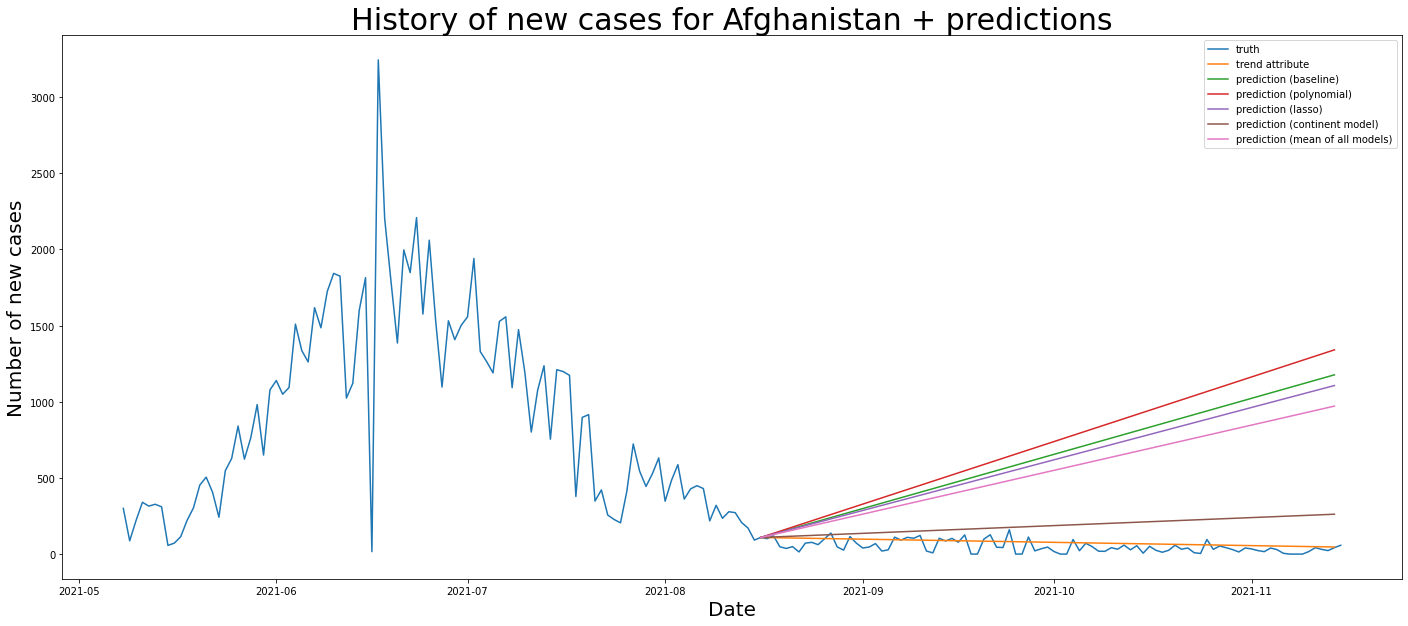

In [ ]:
predict_val("Afghanistan")

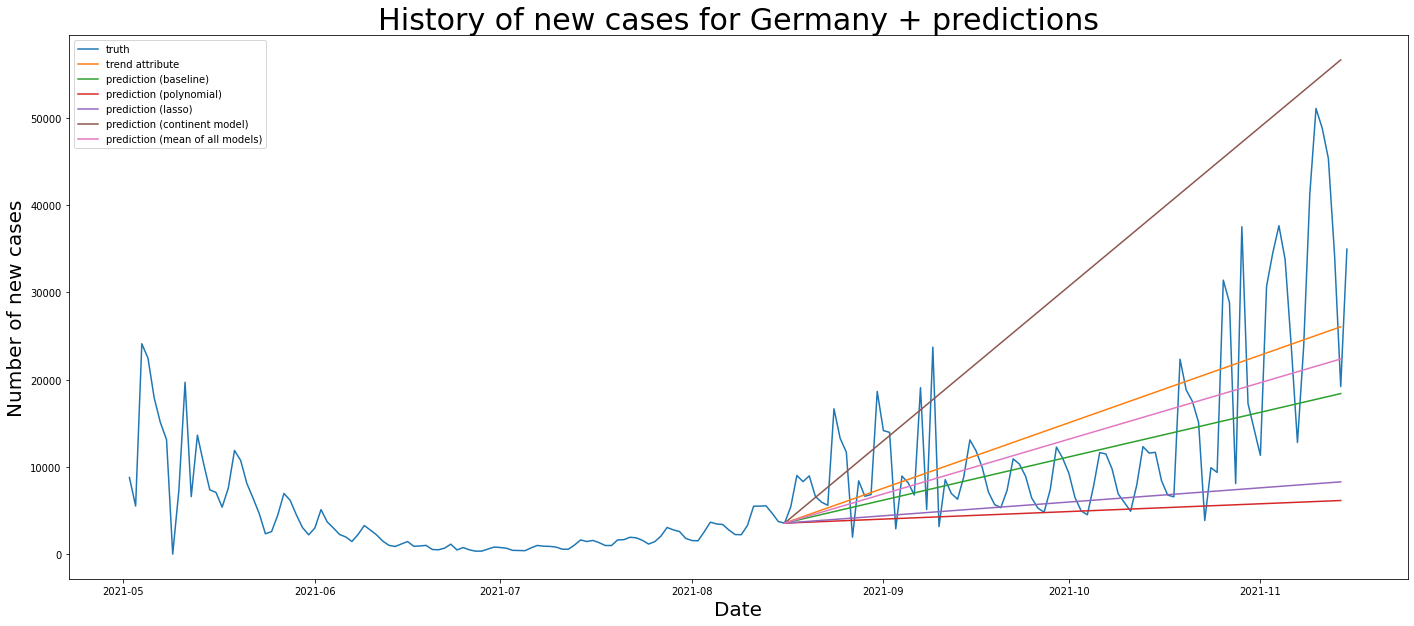

In [ ]:
predict_val("Germany")

# Up-to-Date Predictions

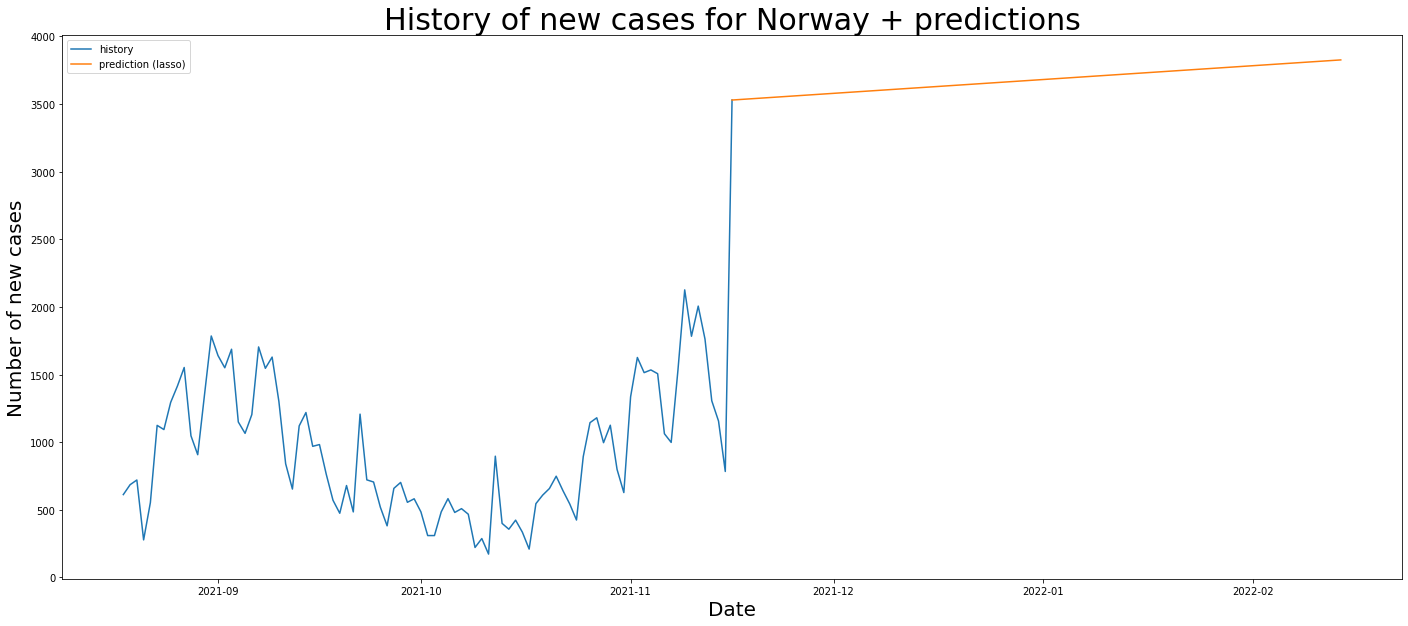

In [53]:
# since the lasso regression model performed best (at least MAE-wise), we'll use it for predictions
def predict(country, custom_X = None):
    temp = df[df["location"] == country]
    # get prediction
    if custom_X is None:
        pred_lasso = best_lasso_reg.predict(temp.iloc[-2:-1][diff_cols])
    else:
        pred_lasso = best_lasso_reg.predict(custom_X[diff_cols])
    pred_lasso = pred_lasso[0] * temp.iloc[-1]["population"] / SCALE
    # convert prediction into actual values
    pred_x = [
        temp.iloc[-1]["date"] + pd.Timedelta(i, "days") for i in range(WINDOW_SIZE + 1)
    ]
    pred_y_lasso = temp.iloc[-1]["new_cases"] + np.arange(WINDOW_SIZE + 1) * pred_lasso
    temp_all = df[df["location"] == country]
    temp_all = temp_all[(temp_all["date"] >= temp.iloc[-1]["date"] - pd.Timedelta(WINDOW_SIZE, "days"))]
    plt.plot(temp_all["date"], temp_all["new_cases"], label="history")
    plt.plot(pred_x, pred_y_lasso, label="prediction (lasso)")
    plt.title("History of new cases for {} + predictions".format(country))
    plt.xlabel("Date")
    plt.ylabel("Number of new cases")
    plt.legend()

predict("Norway")

In [55]:
# we can also change some attributes to see how that affects the prediction
temp = df[df["location"] == "Norway"][-2:-1]
temp

,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,ConfirmedDeaths,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,CountryCode,E1_Income support,E2_Debt/contract relief,EconomicSupportIndex,EconomicSupportIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,H1_Flag,H1_Public information campaigns,H2_Testing policy,H3_Contact tracing,H6_Facial Coverings,H7_Vaccination policy,H8_Protection of elderly people,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,aged_65_older,aged_70_older,cardiovasc_death_rate,continent,date,diabetes_prevalence,gdp_per_capita,handwashing_facilities,human_development_index,life_expectancy,male_smokers,median_age,population,population_density,total_cases,weekday,reproduction_rate,new_deaths,H5_Investment in vaccines,new_cases,location,trend,new_cases_t-1,new_cases_t-2,new_cases_t-3,new_cases_t-4,new_cases_t-5,new_cases_t-6,new_cases_t-7,new_cases_t-8,new_cases_t-9,new_cases_t-10,new_cases_t-11,new_cases_t-12,new_cases_t-13,new_cases_t-14,new_cases_t-15,new_cases_t-16,new_cases_t-17,new_cases_t-18,new_cases_t-19,new_cases_t-20,new_cases_t-21,new_cases_t-22,new_cases_t-23,new_cases_t-24,new_cases_t-25,new_cases_t-26,new_cases_t-27,new_cases_t-28,new_cases_t-29,new_cases_t-30
71771,1.777527,1.553315,1.501821,2.876656,0.614463,1.146404,0.921525,2.573607,954.5,56.015628,35.71,NOR,0.872023,1.000164,43.511295,37.5,54.473244,35.94,0.995589,1.918275,2.046923,1.399763,2.531229,1.530581,1.36982,56.630965,20.37,63.701783,28.57,16.821,10.813,114.316,Europe,2021-11-15,5.31,64800.057,93.954,0.957,82.4,20.7,39.7,5465629.0,14.462,229309.0,0,1.003643,1.0,797156.483584,783.0,Norway,NaN,1156.0,1306.0,1762.0,2006.0,1783.0,2126.0,1532.0,998.0,1062.0,1506.0,1534.0,1514.0,1626.0,1335.0,627.0,798.0,1125.0,996.0,1180.0,1144.0,893.0,424.0,543.0,641.0,748.0,657.0,608.0,545.0,209.0,334.0


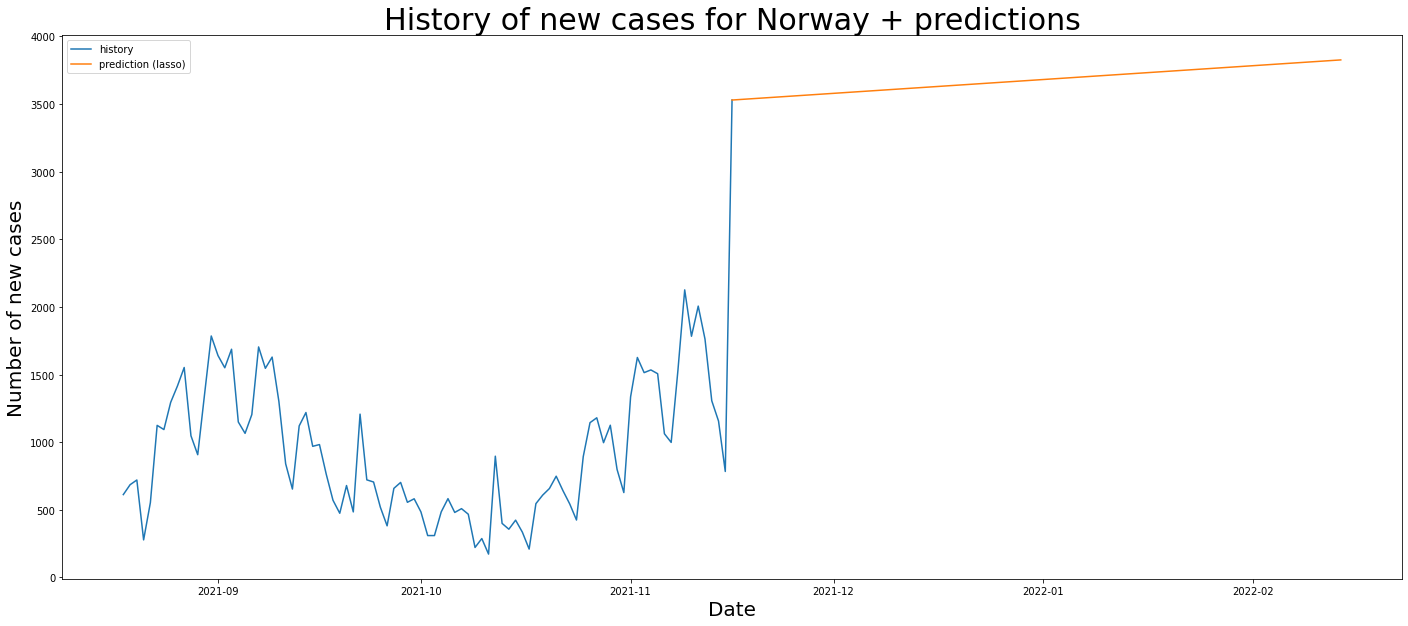

In [58]:
# say we change some policies and as such the string_indency_index changes and see how that affects the model's predictions
temp["StringencyIndex"] = 100
temp["StringencyIndexForDisplay"] = 100
predict("Norway", custom_X=temp)